# 합성곱신경망(CNN)을 사용한 MNIST 손글씨 인식하기
* 미국 국립표준기술원(NIST)에서 고등학생과 인구조사국 직원 등이 쓴 손글씨를 수집하여 만든 70,000개의 숫자 손글씨 데이터셋

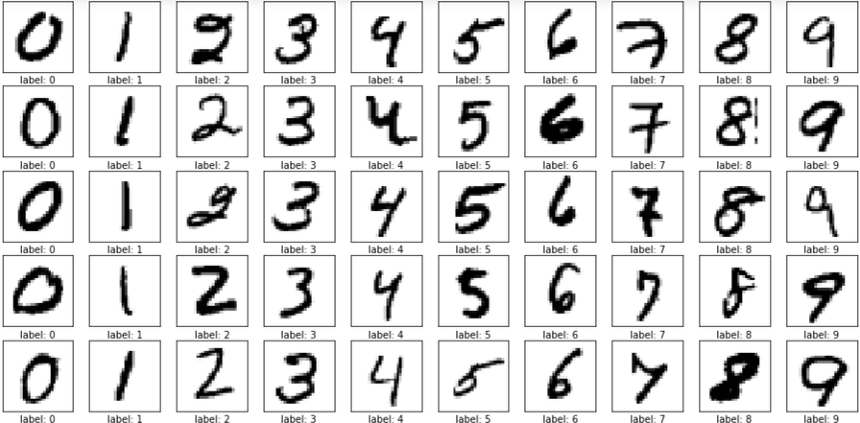
* 총 70000개의 데이터 
* 학습용데이터 60000
* 테스트용 데이터 10000
* 손글씨 한 장의 이미지는 28 x 28 = 784개의 픽셀로 구성

In [1]:
from tensorflow.keras import datasets, models, layers, utils, optimizers
import numpy as np
import matplotlib.pyplot as plt

## Data **준비**

In [2]:
(x_train, y_train),(x_test, y_test)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


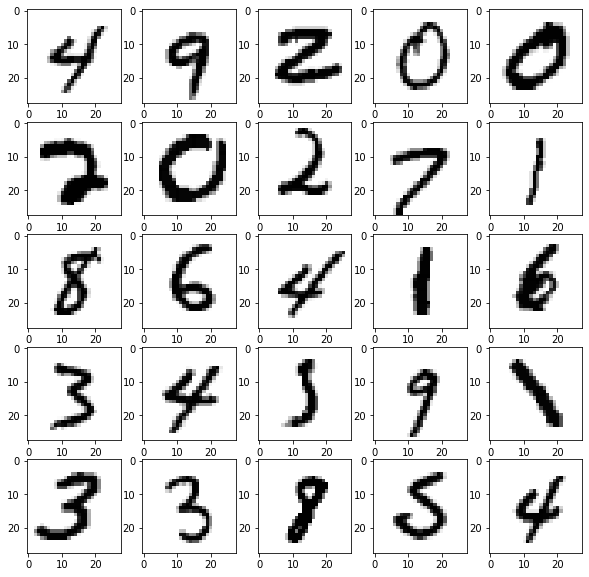

In [4]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
  for j in range(5):
    axs[i, j].imshow(x_train[i*5+j+115], cmap='gray_r')
plt.show()

In [5]:
print(y_train[0:25])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [6]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


### Data reshape - color channel을 추가

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
x_train=x_train.reshape((-1, 28, 28, 1))
x_test=x_test.reshape((-1, 28, 28, 1))

In [9]:
print(x_train.shape)

(60000, 28, 28, 1)


### 정규화

In [11]:
x_train = x_train/255
x_test = x_test/255

### target을 One-Hot Encoding

In [12]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [13]:
# 5->[0 0 0 0 0 1 0 0 0 0]
# 3->[0 0 0 1 0 0 0 0 0 0]

y_train = utils.to_categorical(y_train, num_classes=10)
y_test = utils.to_categorical(y_test, num_classes=10)

In [14]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [15]:
print(y_train.shape)

(60000, 10)


## Model 생성

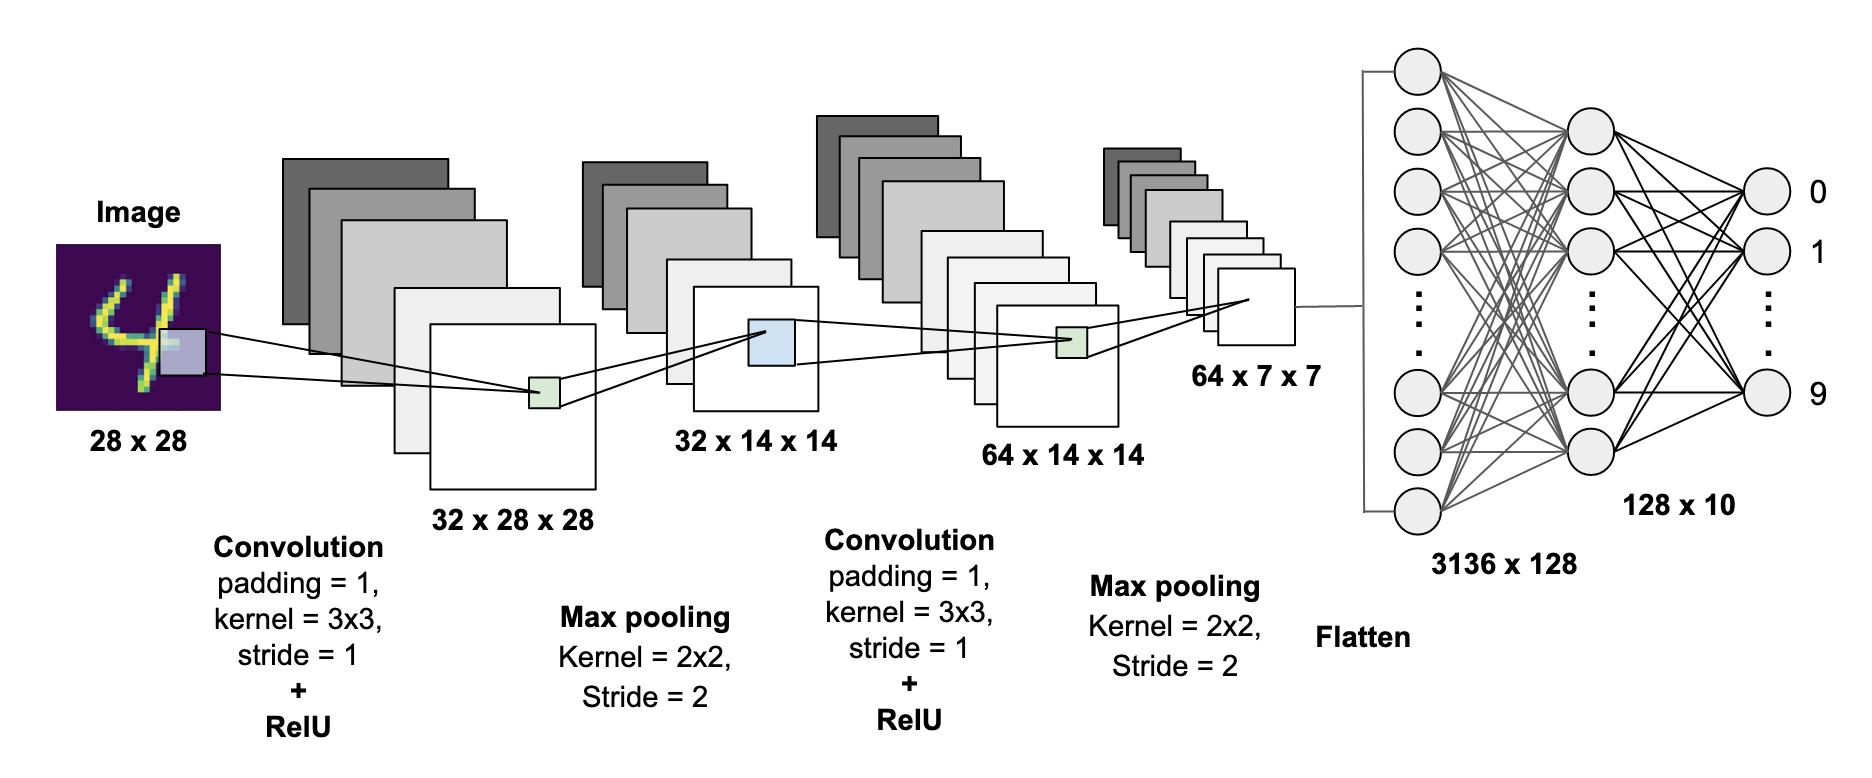

### 특징추출기(Convolution 층)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


### 분류기(Dense 층)

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

## 학습

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 16s 4ms/step - loss: 0.1401 - accuracy: 0.9563 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0465 - val_accuracy: 0.9865
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0303 - accuracy: 0.9902 - val_loss: 0.0467 - val_accuracy: 0.9869
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0335 - val_accuracy: 0.9906
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.0448 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0421 - val_accuracy

### 학습곡선확인

In [20]:
print(history.history)

{'loss': [0.14013032615184784, 0.04262497276067734, 0.030250927433371544, 0.020812805742025375, 0.015683600679039955, 0.011303570121526718, 0.009882431477308273, 0.008804534561932087, 0.006791457999497652, 0.006542752496898174], 'accuracy': [0.956250011920929, 0.9866458177566528, 0.9901875257492065, 0.9936041831970215, 0.9948541522026062, 0.9961458444595337, 0.996916651725769, 0.9971666932106018, 0.9977916479110718, 0.9978541731834412], 'val_loss': [0.04655253142118454, 0.046532850712537766, 0.046656299382448196, 0.033473264425992966, 0.0346057303249836, 0.04479679465293884, 0.042060598731040955, 0.045808110386133194, 0.05174710229039192, 0.04510737583041191], 'val_accuracy': [0.9861666560173035, 0.9865000247955322, 0.9869166612625122, 0.9905833601951599, 0.9912499785423279, 0.9879999756813049, 0.9900833368301392, 0.9890833497047424, 0.9889166951179504, 0.9915000200271606]}


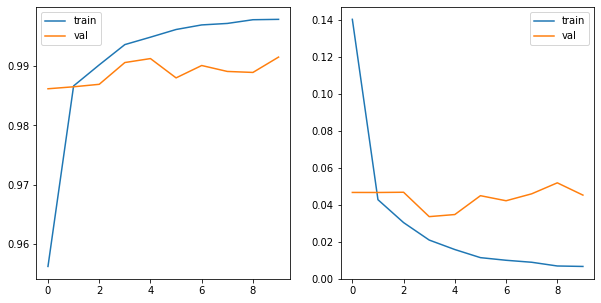

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

plt.show()


## 모델평가

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9911


[0.03711836412549019, 0.991100013256073]

### 예측

In [23]:
pred = model.predict(x_test[115:200])

In [24]:
print(pred)

[[2.40434571e-13 8.04852907e-10 2.53142884e-13 2.24501318e-15
  9.99976516e-01 1.83138860e-09 1.80811643e-09 1.44450797e-11
  8.96698324e-08 2.33786959e-05]
 [2.85427243e-22 1.24153942e-12 5.41768725e-18 3.02356066e-20
  1.00000000e+00 3.55730553e-18 2.47607769e-18 2.06944447e-14
  5.50578086e-16 2.74293630e-12]
 [4.99301337e-23 4.41930089e-14 3.90228823e-18 4.47929762e-22
  1.00000000e+00 3.08296468e-17 1.23588765e-20 1.85240547e-16
  9.80270281e-14 1.89319911e-14]
 [4.02174957e-13 4.39202656e-13 4.04601645e-13 5.18890689e-14
  5.87826108e-08 2.16598744e-12 2.36002827e-14 1.44971243e-10
  5.06213240e-08 1.00000000e+00]
 [6.04783029e-11 4.09418922e-11 9.99976873e-01 6.19711704e-09
  2.33918276e-19 1.79372271e-15 3.19887121e-18 2.31110935e-05
  4.11313472e-09 1.55967565e-13]
 [1.34495014e-21 2.65254637e-17 2.06621962e-20 8.18245862e-13
  1.89164105e-20 1.00000000e+00 8.99785842e-16 1.04383101e-20
  7.37633479e-13 7.37945538e-10]
 [2.10679759e-18 1.84178993e-13 3.74217621e-16 2.71251299e

In [25]:
print(np.argmax(pred, axis=1))

[4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9
 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0
 1 1 1 0 9 0 3 1 6 4 2]


In [26]:
print(np.argmax(y_test[100:200], axis=1))

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0
 1 6 4 6 7 3 1 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3
 2 7 1 8 1 8 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2]


In [27]:
x_test = x_test.reshape(-1, 28, 28)

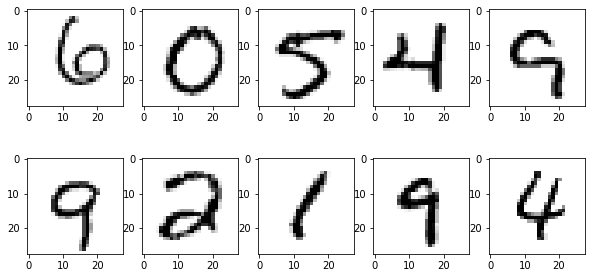

In [28]:
fig, axs = plt.subplots(2, 5, figsize = (10, 5))
for i in range(2):
  for j in range(5):
    axs[i, j].imshow(x_test[i*5+j+100], cmap='gray_r')
plt.show()

https://www.youtube.com/watch?v=3JQ3hYko51Y